In [1]:
pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



In [12]:
# Baixar dados do Ibovespa
data = yf.download('^BVSP', start='1994-01-01', end='2024-07-08')
data = data['Close'].reset_index()


[*********************100%%**********************]  1 of 1 completed


In [13]:

# Preparar os dados para o Prophet
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [18]:

# Dividir dados em treino e teste
train = data[data['ds'] <= '2024-12-31']
test = data[data['ds'] > '2024-01-01']


In [19]:

# Ajustar o modelo Prophet
model = Prophet()
model.fit(train)



20:41:11 - cmdstanpy - INFO - Chain [1] start processing
20:41:22 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# Fazer previsões
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)



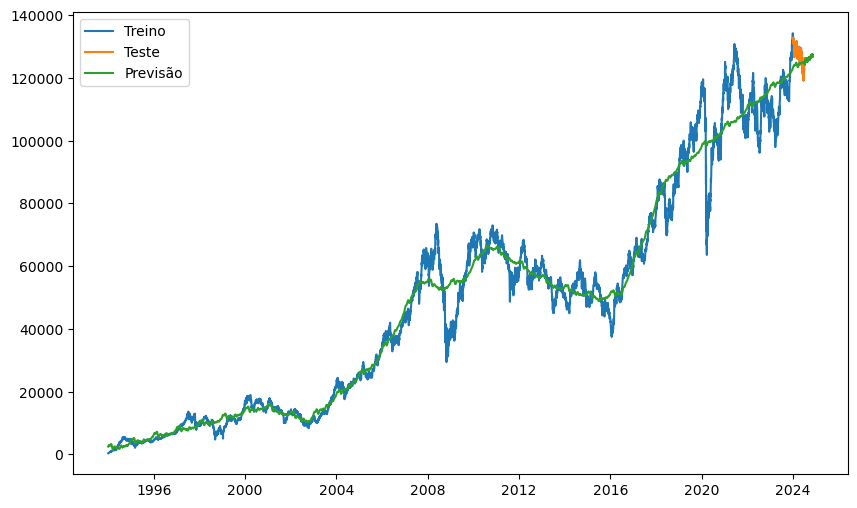

In [21]:
# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(train['ds'], train['y'], label='Treino')
plt.plot(test['ds'], test['y'], label='Teste')
plt.plot(forecast['ds'], forecast['yhat'], label='Previsão')
plt.legend()
plt.show()